In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, TimeSeriesSplit, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#IMPORTING FUNCTIONS FOR CLASSIFIERS METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#OPTMIZE PARAMETHERS
import optuna

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

In [2]:
#PATHS USED
path_quick_test = [
    "./database_raw/DatasetA/zzzAD1.txt",
    "./database_raw/DatasetA/zzzAD30.txt",
    "./database_raw/DatasetA/zzzAD12.txt",
]

path = glob.glob("./database_raw/DatasetA/zzzA*.txt", recursive=True)


In [3]:
## Create pratical database with three different scenarios available on DATASETA, use to test code before apply on full database in order to save time
# df_quick_test = defs_.prepareDatabase(path_quick_test);
### Instead of creating database every time, it was exported as a csv file named 'dataframesimples' on root of project, imported using following code
# df_final.to_csv('dataframe_simples')

## Create full database with all data available on DATASETA
# df_final = defs_.prepareDatabase(path);
### Instead of creating database every time, it was exported as a csv file named 'dataframe_final' on root of project, imported using following code
# df_final.to_csv('dataframe_final')


# df_final

In [4]:
# Initiate DF's 

## Create full database with all data available on DATASETA
# df_final = defs_.prepareDatabase(path);
### Instead of creating database every time, it was exported as a csv file named 'dataframe_final' on root of project, imported using following code
#######
df_final = pd.read_csv('df_csv/dataframe_final', dtype='unicode');
#######

## Create pratical database with three different scenarios available on DATASETA, use to test code before apply on full database in order to save time
# df_quick_test = defs_.prepareDatabase(path_quick_test);
### Instead of creating database every time, it was exported as a csv file named 'dataframesimples' on root of project, imported using following code
#######
df_quick_test = pd.read_csv('df_csv/dataframe_simples', dtype='unicode');
#######

In [5]:
# Start random forest Model

df_rf = df_final

# Setting target variable
y = df_rf['Scenario']

# Setting other variables
X = df_rf.drop(columns=['Scenario'])
X = X.drop(X.columns[[0]], axis=1)

X = X.astype(float)

# Start random forest Model for quick database

df_rf_quick = df_quick_test

# Setting target variable
y_quick = df_rf_quick['Scenario']

# Setting other variables
X_quick = df_rf_quick.drop(columns=['Scenario'])
X_quick = X_quick.drop(X_quick.columns[[0]], axis=1)

X_quick = X_quick.astype(float)


In [6]:
# Segregate database for test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True) 

std_scaler = StandardScaler()
X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index)

# Segregate database for test and train around the quick test database

X_train_quick, X_test_quick, y_train_quick, y_test_quick = train_test_split(X_quick, y_quick, test_size=0.3, random_state=0, shuffle=True) 
X_scaled_train_quick = pd.DataFrame(std_scaler.fit_transform(X_train_quick), columns=X_train_quick.columns, index=X_train_quick.index)
X_scaled_test_quick = pd.DataFrame(std_scaler.transform(X_test_quick),columns=X_train_quick.columns,index=X_test_quick.index)

In [8]:
# START DEFAULT MODEL

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)

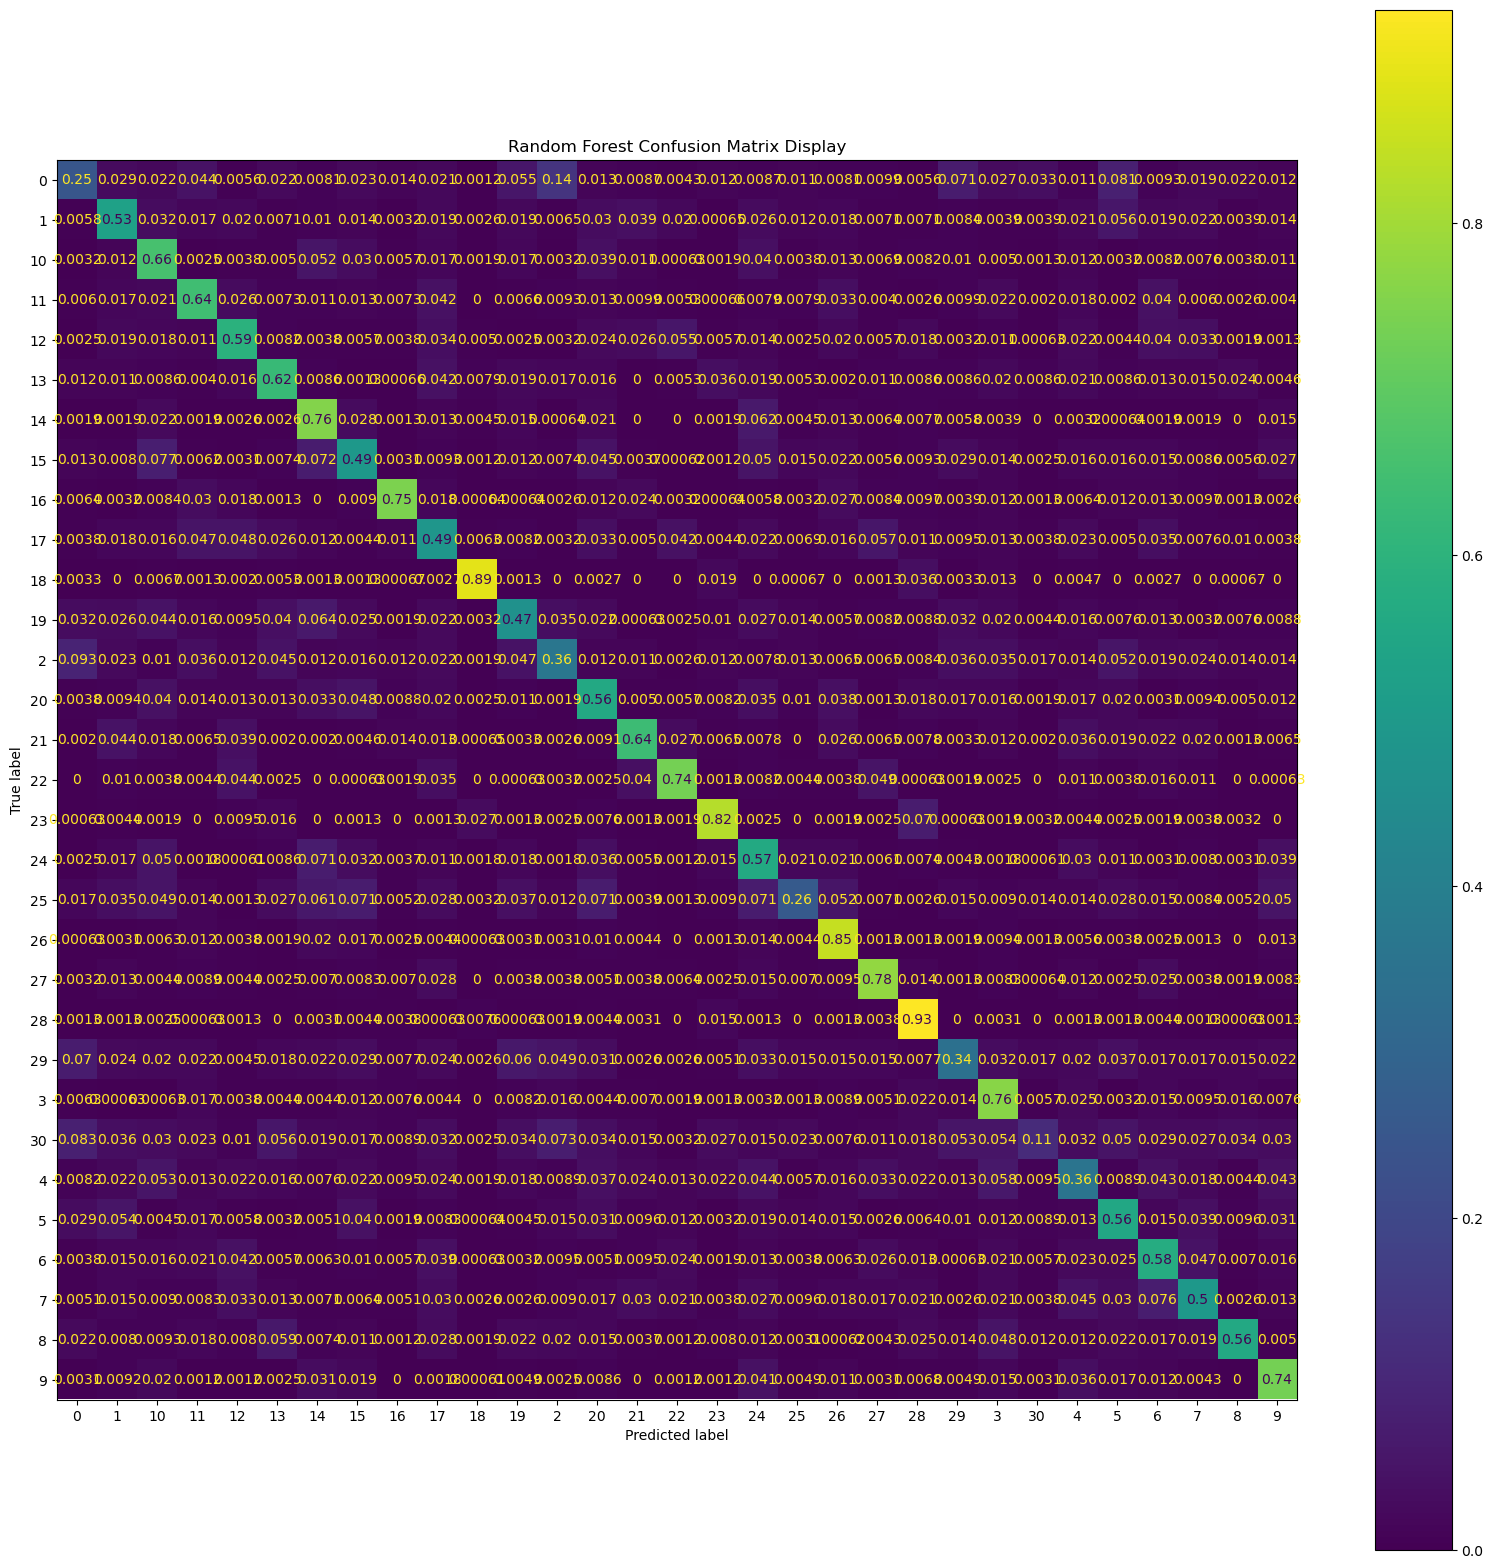

In [9]:
# CONFUSION MATRIX

conf_matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=rf.classes_)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=rf.classes_)


fig, ax = plt.subplots(figsize=(20,20))
plt.title('Random Forest Confusion Matrix Display')
display.plot(ax=ax)


In [10]:
# df_corr = X_quick.iloc[:,:2]
# df_corr = df_corr.astype(float)
# X.corr().to_csv('correlation.csv', sep=';')

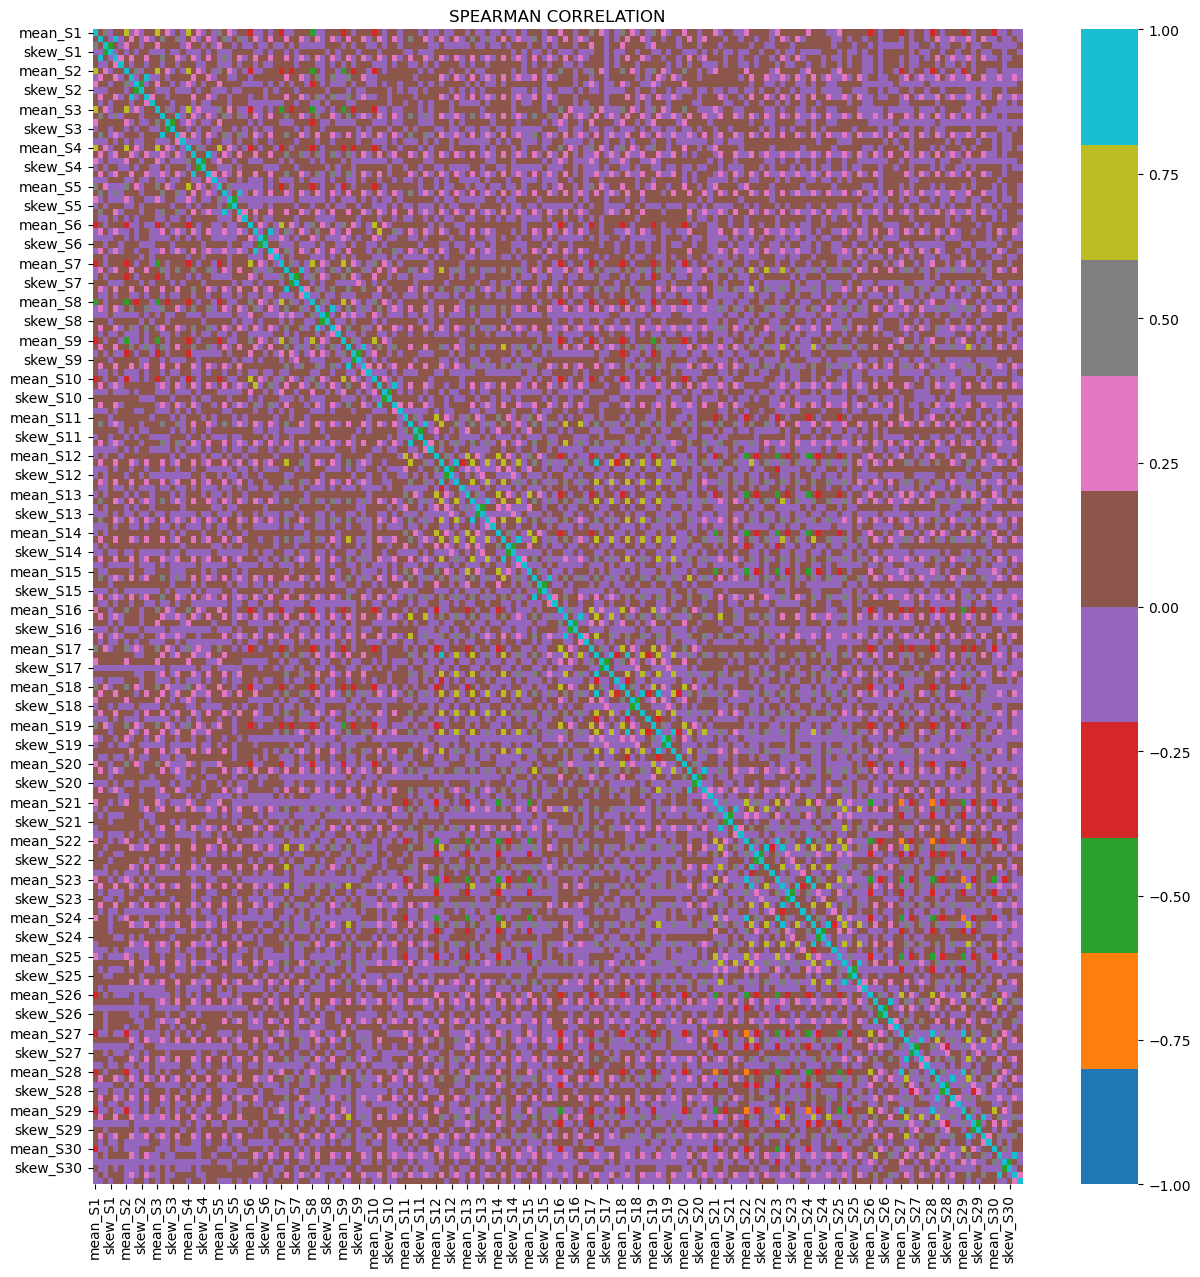

In [17]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS

# X_quick = X_quick.astype(float)
X = X.astype(float)
plt.figure(figsize=(15,15))
plt.title("PEARSON CORRELATION")
sns.heatmap(X.corr(method="pearson"), annot=False, cmap='tab10', vmin=-1, vmax=1);

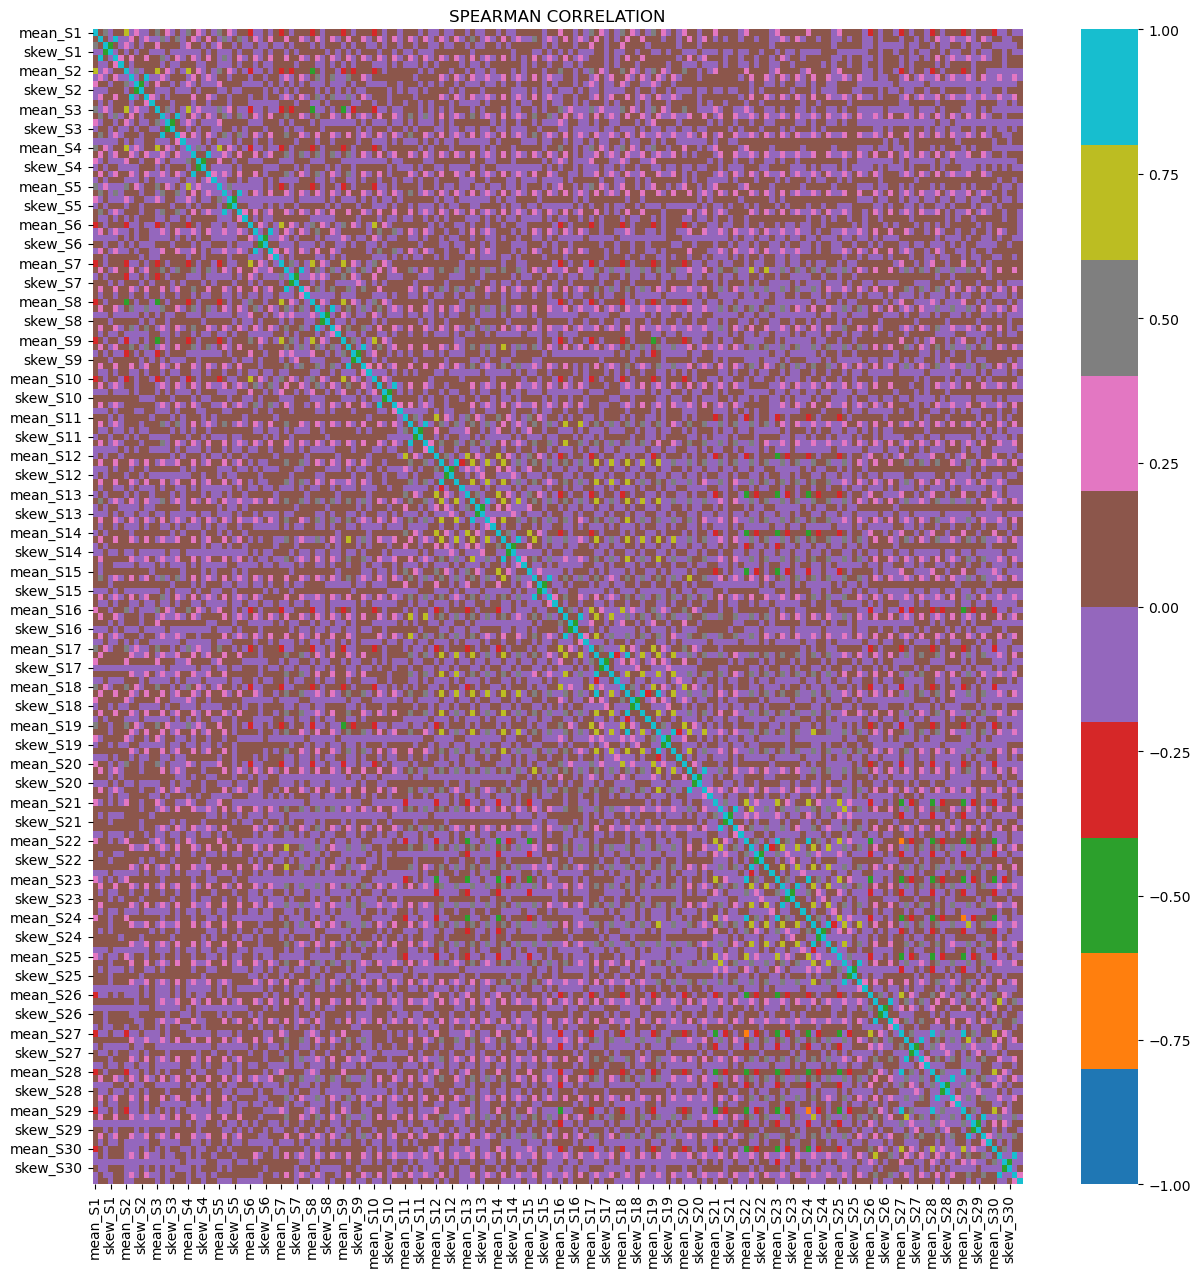

In [19]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS

# X_quick = X_quick.astype(float)
X = X.astype(float)
plt.figure(figsize=(15,15))
plt.title("SPEARMAN CORRELATION")
sns.heatmap(X.corr(method="spearman"), annot=False, cmap='tab10', vmin=-1, vmax=1);

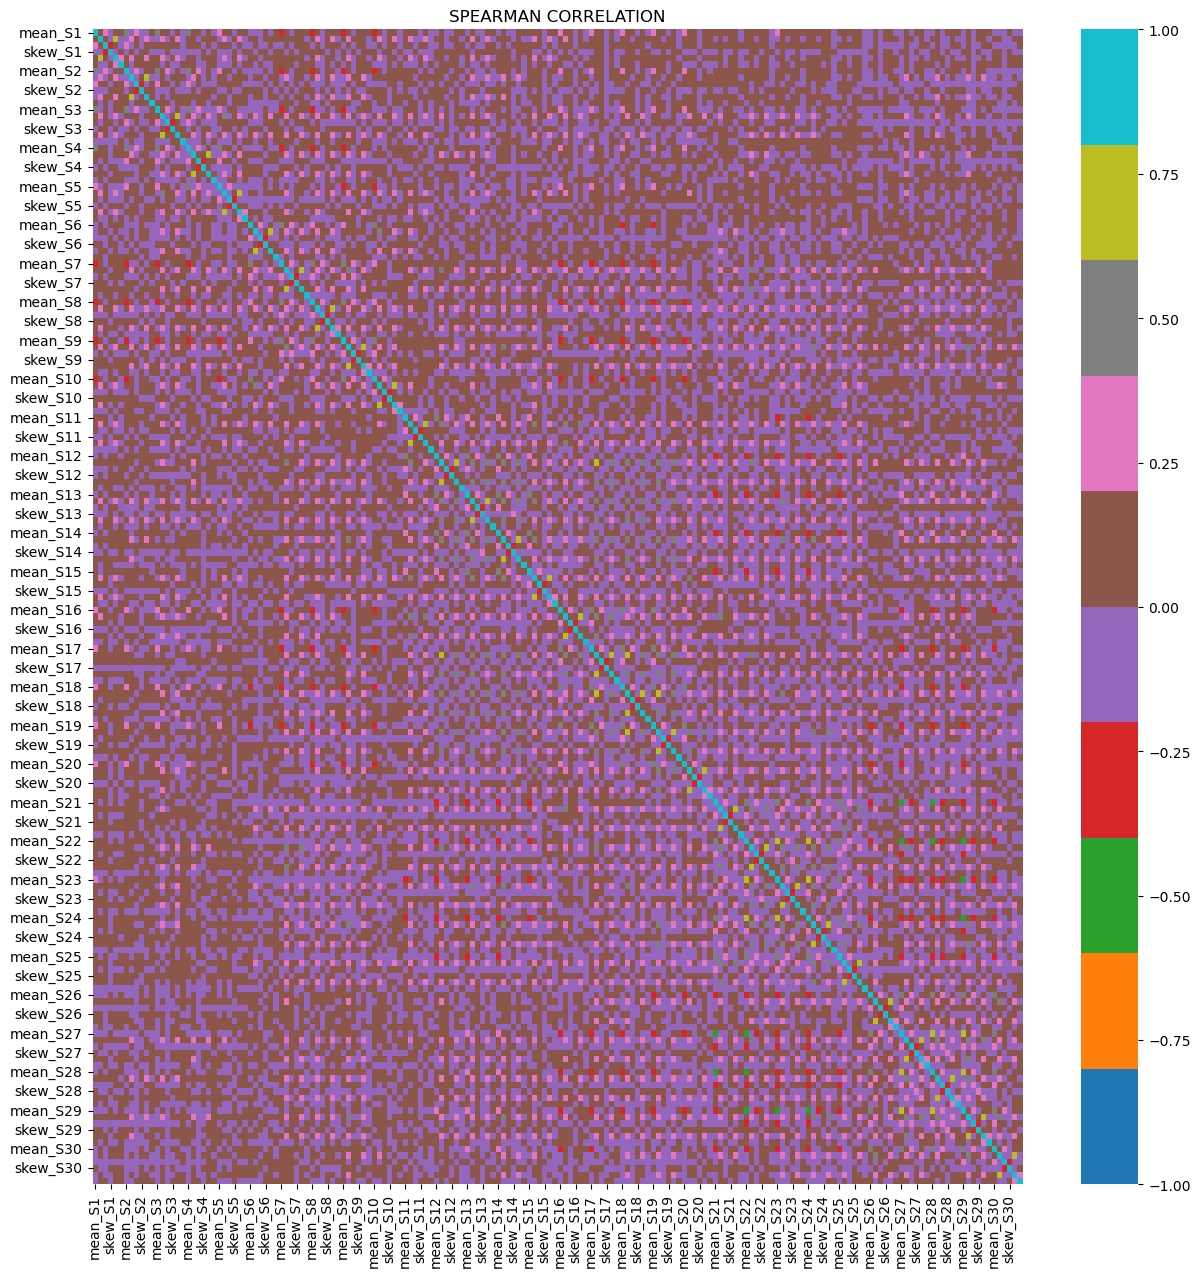

In [20]:
# ENCONTRANDO COVARIÂNCIAS QUADRÁTICAS

# X_quick = X_quick.astype(float)
X = X.astype(float)
plt.figure(figsize=(15,15))
plt.title("KENDALL CORRELATION")
sns.heatmap(X.corr(method="kendall"), annot=False, cmap='tab10', vmin=-1, vmax=1);

In [11]:
accuracy_ = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=rf.classes_))

              precision    recall  f1-score   support

           0       0.37      0.25      0.30      1614
           1       0.52      0.53      0.52      1550
          10       0.52      0.66      0.58      1587
          11       0.59      0.64      0.62      1510
          12       0.59      0.59      0.59      1585
          13       0.58      0.62      0.60      1516
          14       0.57      0.76      0.65      1557
          15       0.49      0.49      0.49      1621
          16       0.82      0.75      0.78      1553
          17       0.45      0.49      0.47      1587
          18       0.90      0.89      0.89      1496
          19       0.52      0.47      0.49      1583
           2       0.43      0.36      0.40      1543
          20       0.48      0.56      0.52      1589
          21       0.67      0.64      0.65      1532
          22       0.74      0.74      0.74      1584
          23       0.78      0.82      0.80      1577
          24       0.47    

In [25]:
### DEFAULT PARAMETHERS ON QUICK DATAFRAME 0.8679805043441408

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_scaled_train_quick,y_train_quick)
y_pred_quick = rf.predict(X_scaled_test_quick)
accuracy_quick = accuracy_score(y_test_quick, y_pred_quick)

accuracy_quick


0.8679805043441408

In [24]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON QUICK DATAFRAME 0.8804831532104259

def objective(trial):
    ### PARAMS
    # param_n_estimators = trial.suggest_int('n_estimators',100,1000);
    # param_max_features = trial.suggest_int('max_features',5,40);
    param_min_samples_split = trial.suggest_int('min_samples_split',2,15);


    rf = RandomForestClassifier(n_estimators=500, max_features=17, min_samples_split = param_min_samples_split)

    rf.fit(X_scaled_train_quick,y_train_quick)
    y_pred_quick = rf.predict(X_scaled_test_quick)
    accuracy_quick = accuracy_score(y_test_quick, y_pred_quick)
    return accuracy_quick

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

study.best_params

[I 2023-05-01 21:54:20,848] A new study created in memory with name: no-name-f2fdfdce-d71e-4e2c-a060-2b92274e5251
[I 2023-05-01 21:55:11,882] Trial 0 finished with value: 0.879423606696334 and parameters: {'min_samples_split': 14}. Best is trial 0 with value: 0.879423606696334.
[I 2023-05-01 21:56:02,742] Trial 1 finished with value: 0.878364060182242 and parameters: {'min_samples_split': 12}. Best is trial 0 with value: 0.879423606696334.
[I 2023-05-01 21:56:54,232] Trial 2 finished with value: 0.8785759694850604 and parameters: {'min_samples_split': 5}. Best is trial 0 with value: 0.879423606696334.
[I 2023-05-01 21:57:45,299] Trial 3 finished with value: 0.8804831532104259 and parameters: {'min_samples_split': 9}. Best is trial 3 with value: 0.8804831532104259.
[I 2023-05-01 21:58:36,622] Trial 4 finished with value: 0.8800593346047891 and parameters: {'min_samples_split': 11}. Best is trial 3 with value: 0.8804831532104259.
[I 2023-05-01 21:59:28,892] Trial 5 finished with value: 0

{'min_samples_split': 3}

In [26]:
### OPTMIZED PARAMETHERS ON QUICK DATAFRAME 0.8828141555414283

rf = RandomForestClassifier(n_estimators=500, max_features=17, min_samples_split = 3)

rf.fit(X_scaled_train_quick,y_train_quick)
y_pred_quick = rf.predict(X_scaled_test_quick)
accuracy_quick = accuracy_score(y_test_quick, y_pred_quick)

accuracy_quick


0.8828141555414283

In [7]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME 0.5880434782608696

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.5873256767842494

In [28]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON FULL DATAFRAME

def objective(trial):
    ### PARAMS
    # param_n_estimators = trial.suggest_int('n_estimators',100,1000);
    param_max_features = trial.suggest_int('max_features',5,40);
    param_min_samples_split = trial.suggest_int('min_samples_split',2,15);


    rf = RandomForestClassifier(n_estimators=100, max_features=17, min_samples_split = param_min_samples_split)

    rf.fit(X_scaled_train,y_train)
    y_pred = rf.predict(X_scaled_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

study.best_params
# max_features': 10, 'min_samples_split': 7 0.5995488105004102

[I 2023-05-01 22:12:53,675] A new study created in memory with name: no-name-5fc34549-3b26-460e-b9ca-0706ad5b12de
[I 2023-05-01 22:17:16,768] Trial 0 finished with value: 0.5994667760459393 and parameters: {'max_features': 26, 'min_samples_split': 8}. Best is trial 0 with value: 0.5994667760459393.
[I 2023-05-01 22:21:29,308] Trial 1 finished with value: 0.5977645611156686 and parameters: {'max_features': 38, 'min_samples_split': 11}. Best is trial 0 with value: 0.5994667760459393.
[I 2023-05-01 22:25:46,532] Trial 2 finished with value: 0.5995488105004102 and parameters: {'max_features': 10, 'min_samples_split': 7}. Best is trial 2 with value: 0.5995488105004102.
[I 2023-05-01 22:29:54,119] Trial 3 finished with value: 0.5950369155045119 and parameters: {'max_features': 25, 'min_samples_split': 14}. Best is trial 2 with value: 0.5995488105004102.
[I 2023-05-01 22:34:25,275] Trial 4 finished with value: 0.5970877768662839 and parameters: {'max_features': 14, 'min_samples_split': 5}. Be

{'max_features': 10, 'min_samples_split': 7}

In [29]:
### OPTMIZED PARAMETHERS OF QUICK DATABASE ON FULL DATAFRAME 0.6314191960623462

rf = RandomForestClassifier(n_estimators=500, max_features=17, min_samples_split = 3)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6314191960623462

In [31]:
### OPTMIZED PARAMETHERS OF FULL DATABASE ON FULL DATAFRAME

rf = RandomForestClassifier(n_estimators=500, max_features=10, min_samples_split = 7)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy
#rf.feature_importances_

0.6171452009844135

In [10]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON FULL DATAFRAME WITH MAX_SAMPLES=0.4

def objective(trial):
    ### PARAMS
    param_max_features = trial.suggest_int('max_features',2,40);
    param_max_depth = trial.suggest_int('max_depth',1,100);


    rf = RandomForestClassifier(n_estimators=1000, max_samples= 0.4 ,max_features= param_max_features, max_depth = param_max_depth )

    rf.fit(X_scaled_train,y_train)
    y_pred = rf.predict(X_scaled_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2000)

study.best_params
# max_features': 10, 'min_samples_split': 7 0.5995488105004102

[I 2023-05-03 23:33:54,296] A new study created in memory with name: no-name-1d46adbc-34e0-435d-9ad5-5fdef353e4f9
[I 2023-05-04 00:15:59,337] Trial 0 finished with value: 0.6124692370795735 and parameters: {'max_features': 33, 'max_depth': 93}. Best is trial 0 with value: 0.6124692370795735.
[I 2023-05-04 00:43:46,598] Trial 1 finished with value: 0.5084905660377359 and parameters: {'max_features': 35, 'max_depth': 11}. Best is trial 0 with value: 0.6124692370795735.
[I 2023-05-04 01:09:54,079] Trial 2 finished with value: 0.6089622641509433 and parameters: {'max_features': 21, 'max_depth': 27}. Best is trial 0 with value: 0.6124692370795735.
[I 2023-05-04 01:22:08,068] Trial 3 finished with value: 0.5988925348646431 and parameters: {'max_features': 9, 'max_depth': 85}. Best is trial 0 with value: 0.6124692370795735.
[I 2023-05-04 01:44:47,914] Trial 4 finished with value: 0.6087366694011485 and parameters: {'max_features': 18, 'max_depth': 81}. Best is trial 0 with value: 0.6124692370

KeyboardInterrupt: 

In [12]:
optuna.visualization.plot_optimization_history(study)

In [13]:
study.best_params

{'max_features': 36, 'max_depth': 40}

In [7]:
### OPTMIZED PARAMETHERS OF FULL DATABASE ON FULL DATAFRAME

rf = RandomForestClassifier(n_estimators=100, max_features=36, max_depth=40, max_samples=0.4)

rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy
#rf.feature_importances_

0.5787120590648073

In [9]:
### OPTMIZED PARAMETHERS OF FULL DATABASE ON FULL DATAFRAME

# rf = RandomForestClassifier(n_estimators=100, max_features=36, max_depth=40, max_samples=0.4)

# rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_train)
accuracy = accuracy_score(y_train, y_pred)

accuracy
#rf.feature_importances_

0.9991737934307788

In [10]:
rf.feature_importances_

array([0.00333585, 0.00998184, 0.00356555, 0.00359896, 0.0065117 ,
       0.00361389, 0.00321635, 0.01092123, 0.00350614, 0.0037092 ,
       0.00693149, 0.00378184, 0.00319555, 0.00707264, 0.00354299,
       0.00369617, 0.00521637, 0.00374955, 0.00328739, 0.01364636,
       0.00353238, 0.00367447, 0.00705194, 0.00390933, 0.00375332,
       0.01067833, 0.003576  , 0.00362543, 0.00679641, 0.00362434,
       0.00352665, 0.00676917, 0.00361715, 0.00378792, 0.00534806,
       0.00365867, 0.00373174, 0.0162393 , 0.00364197, 0.00371222,
       0.00646509, 0.00375817, 0.00338438, 0.00963227, 0.00351421,
       0.00362246, 0.00524251, 0.00364361, 0.00337234, 0.012741  ,
       0.00350482, 0.00372697, 0.00573485, 0.003684  , 0.00351537,
       0.00612339, 0.0035929 , 0.00372512, 0.0049176 , 0.00371892,
       0.00346339, 0.01232311, 0.00362188, 0.00363696, 0.00647385,
       0.00381598, 0.00334795, 0.01123914, 0.00358225, 0.00373839,
       0.0061207 , 0.00388717, 0.00334668, 0.01768237, 0.00343

In [12]:
# et = ExtraTreesClassifier(n_estimators=100)

# et.fit(X_scaled_train,y_train)
# y_pred2 = rf.predict(X_scaled_test)